In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split


[9.99054615e-01 9.19202497e-04]


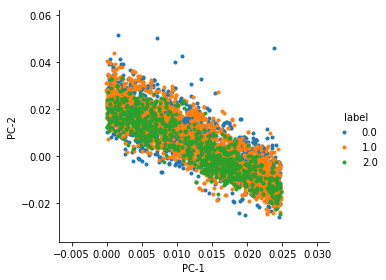

In [83]:

# list = df['quality']
# label0=0
# label1=0
# label2=0
# label3=0
# label4=0
# label5=0
# label6=0
# label7=0
# label8=0
# label9= 0
# for i in range(len(list)):
#     if(list[i]==0):
#         label0 = label0+1
#         print(list[i])
#     if(list[i]==1):
#         label1 = label1+1
#     if(list[i]==2):
#         label2 = label2+1
#     if(list[i]==3):
#         label3 = label3+1
#     if(list[i]==4):
#         label4 = label4+1
#     if(list[i]==5):
#         label5 = label5+1
#     if(list[i]==6):
#         label6 = label6+1
#     if(list[i]==7):
#         label7 = label7+1
#     if(list[i]==8):
#         label8 = label8+1
#     if(list[i]==8):
#         label9 = label9+1
# print(label0)
# print(label1)
# print(label2)
# print(label3)
# print(label4)
# print(label5)
# print(label6)
# print(label7)
# print(label8)
# print(label9)


# df.insert(1,'label',np.ones([len(wine)]),allow_duplicates=True)
# df.loc[df.quality >= 7,'label'] = 2
# df.loc[df.quality <= 5,'label'] = 0
# df.loc[(df.quality == 6),'label'] = 1
# list = df.label
# # print(list)
# label0 = 0
# label1 = 0
# label2 = 0
# for i in range(len(list)):
#     if(list[i]==0):
#         label0 = label0+1
#     if(list[i]==1):
#         label1 = label1+1
#     if(list[i]==2):
#         label2 = label2+1
# print(label0)
# print(label1)
# print(label2)
# labels = ['high quality','medium quality','low quality']
# x = [label2,label1,label0]

# fig = plt.figure()
# plt.pie(x,labels=labels,autopct='%1.2f%%',explode = [0,0.1,0],colors  = ["coral","orange","green"]) 
# plt.title("quality distribution") 
# plt.show()
# wine.hist(column='quality', orientation=u'vertical',alpha=0.8)
# plt.title("Distribution of Quality Value")
# # 为两条坐标轴设置名称
# plt.xlabel("Quality Value")
# plt.ylabel("count")
# plt.show()
from sklearn.decomposition import PCA
wine = pd.read_csv('winequality-white-index.csv')
df = pd.DataFrame(wine)
df.insert(1,'label',np.ones([len(wine)]),allow_duplicates=True)
df.loc[df.quality >= 7,'label'] = 2
df.loc[df.quality <= 5,'label'] = 0
df.loc[df.quality == 6,'label'] = 1
df.head(5)
# list = df.columns.values.tolist()
# for i in list:
#     for j in list:       
#         g = sb.FacetGrid(df,hue = "label",height = 5,aspect=1).map(plt.scatter,i,j,marker=".",edgecolor="w")
pca = PCA(n_components=2)
pca.fit(df.T)
PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)
df1 = DataFrame(pca.components_.T,columns=['PC-1','PC-2'])
df2 = pd.concat([df1,df["label"]],axis=1)
g = sb.FacetGrid(df2,hue = "label",height = 4,aspect=1.2).map(plt.scatter,"PC-1","PC-2",marker=".")
g.add_legend() 

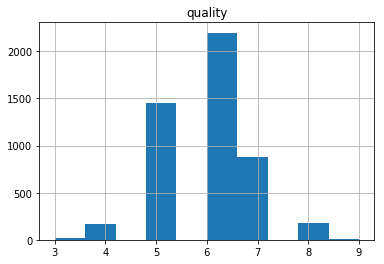

            feature_name  corr_values
7                density    -0.307123
4              chlorides    -0.209934
1       volatile_acidity    -0.194723
6   total_sulfur_dioxide    -0.174737
0          fixed_acidity    -0.113663
3         residual_sugar    -0.097577
2            citric_acid    -0.009209
5    free_sulfur_dioxide     0.008158
9              sulphates     0.053678
8                     pH     0.099427
10               alcohol     0.435575


Text(0.5,1,'Correlation coefficient of the variables')

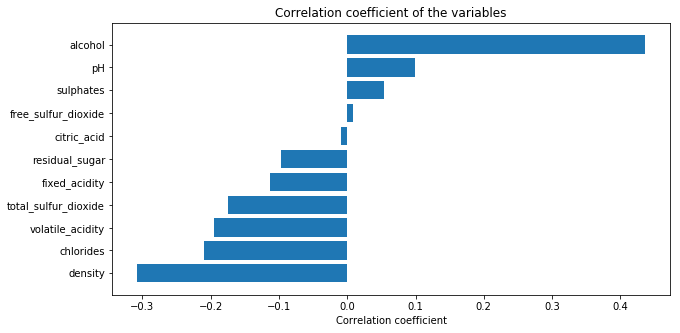

In [116]:
# 'volatile_acidity','density','pH','sulphates','alcohol'
wine = pd.read_csv('winequality-white-index.csv')
wine.head()
wine.hist(column='quality')
plt.show()
# ------pearson-------
x_cols = [col for col in wine.columns if col not in ['quality'] if col not in ['index']]
# print(x_cols)
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(wine[col].values, wine.quality,values)[0, 1])
    
 
corr_df = pd.DataFrame({'feature_name':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by = 'corr_values')
print(corr_df)
ind = np.arange(len(labels))
width = 0.5
fig,ax = plt.subplots(figsize = (10,5))
rects = ax.barh(ind, np.array(corr_df.corr_values.values))
 
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.feature_name.values)
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')
#-------end of pearson--------

# # ---------split train&test dataset-------------

# wine = pd.read_csv('winequality-white-index.csv')
# wine = np.array(wine)
# rand.shuffle(wine)#随机打乱
# #取前70%为训练集
# allurl_fea = [d[0] for d in wine]
# df1=wine[:int(0.7*len(allurl_fea))]
# #将np.array转为dataframe，并对两列赋列名
# # print(df1)
# df1=pd.DataFrame(df1,columns=['index','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides'
#                              ,'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])
# #写入csv
# df1.to_csv("train_samples.csv",index=False)


# #剩余百分之30为测试集
# df2=wine[int(0.7*len(allurl_fea)):]
# df2=pd.DataFrame(df2,columns=['index','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides'
#                              ,'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])
# #写入csv
# df2.to_csv("test_samples.csv",index=False)

In [117]:
def K_means(df,K,max_iter = 100, tol = pow(10,-3)):
    
    all_vals = df[['volatile_acidity','density','pH','sulphates','alcohol']].values
    
    init = np.zeros(K)
    center = np.zeros(shape=(K, 5))
    new_center = center
    d = np.zeros(K)
    label = np.zeros(len(all_vals))
    index = np.zeros(shape=(K, len(all_vals)))
    it = 0
    all_sse = []
# # ------test set
#     if train_flag == 0:
#         init_list = rand.sample(range(0, len(all_vals) - 1), K);
#         init = np.array(init_list)
#         for i in range(K):
#             center[i] = (all_vals[int(init[i])])
# # ------train set
#     if train_flag == 1:

    init_list = []

    df0 = df[(df.label==0)]
    df0_init = df0.sample(1)
    val0 = df0_init['index'].values
    init_list.append(val0)
    #         print(val0)

    df1 = df[(df.label==1)]
    df1_init = df1.sample(1)
    val1 = df1_init['index'].values
    init_list.append(val1)

    df2 = df[(df.label==2)]
    df2_init = df1.sample(1)
    val2 = df2_init['index'].values
    init_list.append(val2)

    init = np.array(init_list)

    for i in range(K):
        center[i] = init[i]
#         print(center[i])


        
    for it in range(max_iter):
        for i in range(len(all_vals)):
            for j in range(K):
                d[j] = np.sqrt((all_vals[i, 0] - center[j, 0]) ** 2 + (all_vals[i, 1] - center[j, 1]) ** 2 + (
                            all_vals[i, 2] - center[j, 2]) ** 2 + (all_vals[i, 3] - center[j, 3]) ** 2 
                               + (all_vals[i, 4] - center[j, 4]) ** 2)
            label[i] = np.argmin(d)
        e = 0
        new_center = np.zeros(shape=(K, 5))

        for i in range(K):
            index[i] = np.pad([x for x, y in enumerate(label) if y == i],
                              (0, len(all_vals) - len([x for x, y in enumerate(label) if y == i])), 'constant',
                              constant_values=-1)
            temp_cluster = [x for x in index[i] if x != -1]

            for j in range(len(temp_cluster)):
                new_center[i] = [new_center[i, 0] + all_vals[int(temp_cluster[j]), 0],
                                 new_center[i, 1] + all_vals[int(temp_cluster[j]), 1],
                                 new_center[i, 2] + all_vals[int(temp_cluster[j]), 2],
                                 new_center[i, 3] + all_vals[int(temp_cluster[j]), 3],
                                 new_center[i, 4] + all_vals[int(temp_cluster[j]), 4]]
                e = e + np.sqrt((all_vals[int(temp_cluster[j]), 0] - center[i, 0]) ** 2 + (
                            all_vals[int(temp_cluster[j]), 1] - center[i, 1]) ** 2 + (
                                            all_vals[int(temp_cluster[j]), 2] - center[i, 2]) ** 2 + (
                                            all_vals[int(temp_cluster[j]), 3] - center[i, 3]) ** 2 + 
                                        (all_vals[int(temp_cluster[j]),4]-center[i,4]) **2)
            if len(temp_cluster) != 0:
                new_center[i] = [new_center[i, 0] / len(temp_cluster), new_center[i, 1] / len(temp_cluster),
                                 new_center[i, 2] / len(temp_cluster), new_center[i, 3] / len(temp_cluster),
                                 new_center[i, 4] / len(temp_cluster)]

        all_sse.append(e)
        if np.absolute(all_sse[it] - all_sse[it - 1]) / all_sse[it - 1] <= tol and it > 2:
            return (label, center, all_sse, it)
        center = new_center

In [118]:
# print(wine)
wine = pd.read_csv('winequality-white-index.csv')
df = pd.DataFrame(wine)
# print(df)
df.insert(1,'label',np.ones([len(wine)]),allow_duplicates=True)
# df.loc[df.quality >= 8,'label'] = 2
# df.loc[df.quality <= 5,'label'] = 0
# df.loc[(df.quality == 6)|(df.quality == 7),'label'] = 1
df.loc[df.quality >= 7,'label'] = 2
df.loc[df.quality <= 5,'label'] = 0
df.loc[df.quality == 6,'label'] = 1
# df.loc[df.quality ==3,'label'] = 0
# df.loc[df.quality ==4,'label'] = 1
# df.loc[df.quality ==5,'label'] = 2
# df.loc[df.quality ==6,'label'] = 3
# df.loc[df.quality ==7,'label'] = 4
# df.loc[df.quality ==8,'label'] = 5
# df.loc[df.quality ==9,'label'] = 6




# print(len(df))
# print(len(label))
# print
X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size =0.1, random_state=43)


In [140]:
# ------using inbuilt function
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# estimator = PCA(n_components=2)
# estimator.fit(X_test)
# pca_X_test = estimator.transform(X_test)
# estimator = KMeans(n_clusters=3, max_iter=1000, n_init=10).fit(pca_X_test)
# labelpred = estimator.fit_predict(pca_X_test)
# accuracy_score(y_test, labelpred)
# print(accuracy_score(y_test, labelpred))

estimator = KMeans(n_clusters=2, max_iter=1000, n_init=10).fit(X_train)
labelpred = estimator.fit_predict(X_train)
accuracy_score(y_train, labelpred)
print(accuracy_score(y_train, labelpred))
a1 = accuracy_score(y_train, labelpred)
estimator = KMeans(n_clusters=2, max_iter=1000, n_init=10).fit(X_test)
labelpred = estimator.fit_predict(X_test)
accuracy_score(y_test, labelpred)
print(accuracy_score(y_test, labelpred))
a2 = accuracy_score(y_test, labelpred)


0.35526315789473684
0.363265306122449


In [142]:
#------adding labels for train-------
# data_train = pd.read_csv('train_samples.csv')
df_train = X_train

#selected features for train
df1_train=df_train.drop(['fixed_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','quality'],axis=1)
# print(df1_train)
# print(y_train)
train_vals = df1_train[['volatile_acidity','density','pH','sulphates','alcohol']].values


#------adding labels for test-------
# data_test = pd.read_csv('test_samples.csv')
df_test = X_test 
df1_test=df_test.drop(['fixed_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','quality'],axis=1)
# print(df1)
test_vals = df1_test[['volatile_acidity','density','pH','sulphates','alcohol']].values


# label, cens, sse, it = K_means(train_vals,df1_train, 3, 1)
klabel, cens, sse, it = K_means(df1_train, 3)
print(accuracy_score(y_train, klabel))
a3 = accuracy_score(y_train, klabel)


0.4498638838475499


In [148]:
klabel, cens, sse, it = K_means(df1_test, 3)
print(accuracy_score(y_test, klabel))
a4 = accuracy_score(y_test, klabel)

# plt.scatter(all_vals[:,0], all_vals[:,1], c=label)
# plt.show()
# plt.scatter(all_vals[:,0], all_vals[:,4], c=label)

# print(label)
# list = label


# label0 = 0
# label1 = 0
# label2 = 0
# for i in range(len(list)):
#     if(list[i]==0):
#         label0 = label0+1
#     if(list[i]==1):
#         label1 = label1+1
#     if(list[i]==2):
#         label2 = label2+1
# print(label0)
# print(label1)
# print(label2)
# list1 = [label0,label1,label2]
# list2 = ['0','1','2']
# plt.bar(range(3),list1,width = 0.4)
# plt.show()


# list_ori = df.label
# print(list_ori)

# plt.bar(range(3),list_ori,width = 0.4)
# plt.show()


0.4387755102040816


Text(0.5,0,'different implementation')

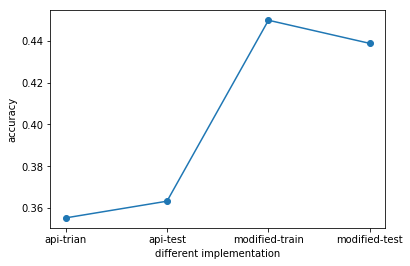

In [149]:
x=['api-trian','api-test','modified-train','modified-test']
y=[a1,a2,a3,a4]
plt.plot(x,y,'-o')
plt.ylabel('accuracy')
plt.xlabel('different implementation')

In [ ]:
K = 10
SSE = np.zeros(shape=(K,50))
SSE_mean = np.zeros(K)
# all_vals = df[['volatile_acidity','density','pH','sulphates','alcohol']].values
for i in range(K):
    a, b, temp, d = K_means(df, i+1)
    for j in range(50):
        SSE[i,j] = temp[-1]
    SSE_mean[i] = np.mean(SSE[i])
print(SSE_mean)
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x,SSE_mean,'-o')
plt.ylabel('mean sse')
plt.xlabel('K from 1 to 10')